### 导入相关需要的库

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
from numpy import set_printoptions
set_printoptions(suppress=True)

### 画图（可视化函数）

In [3]:
def plot_forecastpoint(predicted_data):
    fig = plt.figure(facecolor='white')
    plt.plot(predicted_data, label='forecastpoint')
    plt.legend()
    plt.show()

In [4]:
def plot_multiple(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data)
    plt.plot(predicted_data)
    plt.show()

In [5]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(predicted_data, label='Prediction')
    plt.plot(true_data, label='true_data')
    plt.legend()
    plt.show()

#### * 1.加载数据

In [6]:
configs = json.load(open('config.json', 'r'))
df = pd.read_csv('./data/sh600031.csv')  # 读取股票文件

#### * 2.加载模型预测的库文件

In [7]:
from model_predict import model_predict

* 1.dataframe：用于预测的pd.DataFrame类别的数据（实验数据集没有新的数据，因此还是用训练模型时用的测试集数据以验证）
* 2.cols：要进行数据采样的列（需与模型对应）

In [8]:
forecast = model_predict(df.iloc[int(len(df)*configs['data']['train_test_split']):,],cols=configs['data']['columns'])

* 1.模型路径
* 2.seq_len：序列长度（与模型构建时设置参数保持一致））
* 3.input_timesteps:步进步数（可以理解为将用input_timesteps数量的数据预测（seq_len-input_timesteps）数据的数据）（与模型构建时设置参数保持一致）
* 4.normalise：是否归一化（与模型构建时设置参数保持一致）

#### *3.进行预测

In [9]:
forecastpoint,y_test = forecast.forecast(
        "saved_models/20211210-170543-e32.h5",
        seq_len=configs['data']['sequence_length'],
        input_timesteps=configs['data']['input_timesteps'],
        normalise=configs['data']['normalise'])

[Model] Loading model from file saved_models/20211210-170543-e32.h5
[Model] Predicting Point-by-Point...


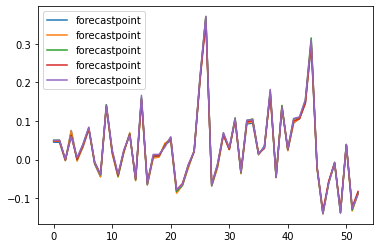

In [10]:
# 画图
plot_forecastpoint(forecastpoint)

In [11]:
forecastpoint.shape,y_test.shape

((53, 5), (53, 25))

In [12]:
pd.DataFrame(forecastpoint).head()

,0,1,2,3,4
0,0.045153,0.047827,0.050100,0.048509,0.049906
1,0.044683,0.047298,0.050018,0.048628,0.050219
2,-0.002444,-0.002989,-0.000777,-0.000654,0.000964
3,0.075270,0.074963,0.062950,0.062383,0.059833
4,0.000056,-0.004107,-0.000384,0.000521,0.005463


In [13]:
pd.DataFrame(y_test).head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,-0.004000,0.004000,-0.002000,-0.006000,-0.002000,-0.010000,-0.020000,-0.010000,-0.008000,...,0.046000,0.044000,0.040000,0.044000,0.068000,0.064000,0.060000,0.060000,0.050000,0.048000
1,0.0,0.005725,0.005725,0.019084,0.020992,-0.003817,0.001908,-0.005725,0.003817,0.013359,...,0.024809,0.011450,0.024809,0.043893,0.057252,0.049618,0.053435,0.064885,0.047710,0.045802
2,0.0,-0.014815,-0.011111,-0.009259,-0.014815,-0.020370,-0.031481,-0.024074,-0.016667,0.009259,...,0.020370,0.042593,0.044444,0.037037,0.037037,0.037037,0.009259,0.009259,0.001852,0.005556
3,0.0,0.009141,0.021938,0.014625,0.042048,0.036563,0.016453,0.038391,0.036563,0.034735,...,0.095064,0.074954,0.078611,0.074954,0.074954,0.087751,0.078611,0.113346,0.115174,0.149909
4,0.0,0.056748,0.035276,0.030675,0.050613,0.030675,0.026074,0.033742,0.015337,0.004601,...,-0.018405,-0.044479,-0.039877,-0.015337,0.021472,0.015337,-0.021472,-0.012270,-0.007669,-0.004601


In [14]:
import numpy as np

#### *4.将预测的每一个数据点按照input_timesteps间隔插入y_test即可得到完整的数据，
#### 此时要注意，最后一组数据预测出来的最新一个数据还未插回去

In [15]:
forecast_test = y_test.copy()
for i in range(1,len(y_test)):
    forecast_test[i] = np.append(forecastpoint[i-1],np.delete(forecast_test[i], np.s_[::configs['data']['sequence_length']-configs['data']['input_timesteps']]))

In [16]:
y_test.shape,forecast_test.shape

((53, 25), (53, 25))

In [17]:
pd.DataFrame(forecast_test).head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,-0.004000,0.004000,-0.002000,-0.006000,-0.002000,-0.010000,-0.020000,-0.010000,-0.008000,...,0.046000,0.044000,0.040000,0.044000,0.068000,0.064000,0.060000,0.060000,0.050000,0.048000
1,0.045153,0.047827,0.050100,0.048509,0.049906,0.005725,0.005725,0.019084,0.020992,0.001908,...,0.022901,0.026718,0.011450,0.024809,0.043893,0.057252,0.053435,0.064885,0.047710,0.045802
2,0.044683,0.047298,0.050018,0.048628,0.050219,-0.014815,-0.011111,-0.009259,-0.014815,-0.031481,...,0.024074,0.018519,0.042593,0.044444,0.037037,0.037037,0.009259,0.009259,0.001852,0.005556
3,-0.002444,-0.002989,-0.000777,-0.000654,0.000964,0.009141,0.021938,0.014625,0.042048,0.016453,...,0.069470,0.078611,0.074954,0.078611,0.074954,0.074954,0.078611,0.113346,0.115174,0.149909
4,0.075270,0.074963,0.062950,0.062383,0.059833,0.056748,0.035276,0.030675,0.050613,0.026074,...,-0.003067,-0.009202,-0.044479,-0.039877,-0.015337,0.021472,-0.021472,-0.012270,-0.007669,-0.004601


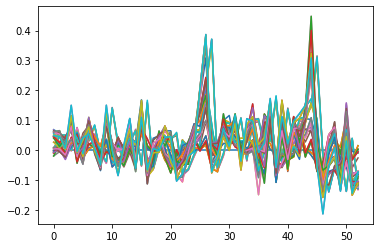

In [18]:
# 画图
plot_multiple(forecast_test,y_test)

#### 将forecast_test和y_test都完全展开，得到连续的每天的数据

In [19]:
forecast_test = forecast_test.reshape(-1)
y_test = y_test.reshape(-1)

#### 将最新预测的n个数据插回forecast_test

In [20]:
# 预测的最新n天：
predict_n = forecastpoint[-1]
print(predict_n)
forecast_test = np.append(forecast_test,predict_n)

[-0.0868687  -0.08752564 -0.08760452 -0.08281993 -0.09021568]


In [21]:
forecast_test.shape,y_test.shape

((1330,), (1325,))

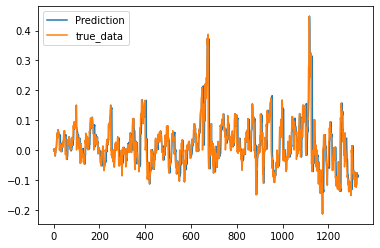

In [22]:
plot_results(forecast_test,y_test)

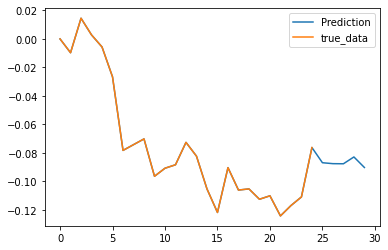

In [23]:
plot_results(np.append(y_test[-configs['data']['input_timesteps']:],predict_n),
             y_test[-configs['data']['input_timesteps']:])

In [24]:
pd.DataFrame(pd.concat([pd.DataFrame(forecast_test[-configs['data']['sequence_length']:].reshape(1,-1)),pd.DataFrame(y_test[-configs['data']['input_timesteps']:].reshape(1,-1))]))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.128083,-0.133417,-0.131114,-0.124195,-0.127628,-0.009677,0.014516,0.002823,-0.005645,-0.078226,...,-0.112500,-0.124194,-0.116935,-0.110887,-0.07621,-0.086869,-0.087526,-0.087605,-0.08282,-0.090216
0,0.000000,-0.009677,0.014516,0.002823,-0.005645,-0.026613,-0.078226,-0.074194,-0.070161,-0.096371,...,-0.110081,-0.124194,-0.116935,-0.110887,-0.07621,NaN,NaN,NaN,NaN,NaN


### 不成熟的复原函数

In [25]:
forecast.reversal_normalis(predict_n)

array([[1.1620396, 1.1337719, 1.1303777, 1.3362583, 1.0180194]],
      dtype=float32)